In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploratory Data Analysis(EDA)

In [2]:
df = pd.read_csv('Data_set/fake_job_postings.csv')

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.shape

(17880, 18)

In [5]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
# check for missing values
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
# percentage of missing values
df.isnull().sum() / len(df) * 100 

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.078300
benefits               40.335570
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [9]:
# for text columns, we can replace missing values with missing
text_columns = ['company_profile', 'description', 'requirements', 'benefits']
df[text_columns] = df[text_columns].fillna('missing')

<p> Here we are dealing with prediction of fake job posting so, we will fill missing values with relevant placeholders. Due to the nature of prediction, this seems feasible. </p>

In [34]:
# for categorical columns, we can replace missing values with the relevant placeholders
df['employment_type'] = df['employment_type'].fillna('Not Specified')
df['required_experience'] = df['required_experience'].fillna('Not Specified')
df['required_education'] = df['required_education'].fillna('Not Specified')
df['industry'] = df['industry'].fillna('Not Specified')
df['function'] = df['function'].fillna('Not Specified')
df['location'] = df['location'].fillna('Unknown')
df['department'] = df['department'].fillna('Unknown')


In [11]:
df['salary_range'] = df['salary_range'].fillna('Not Specified')

In [12]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

<p>Let's do some visualization. shall we ?</p>

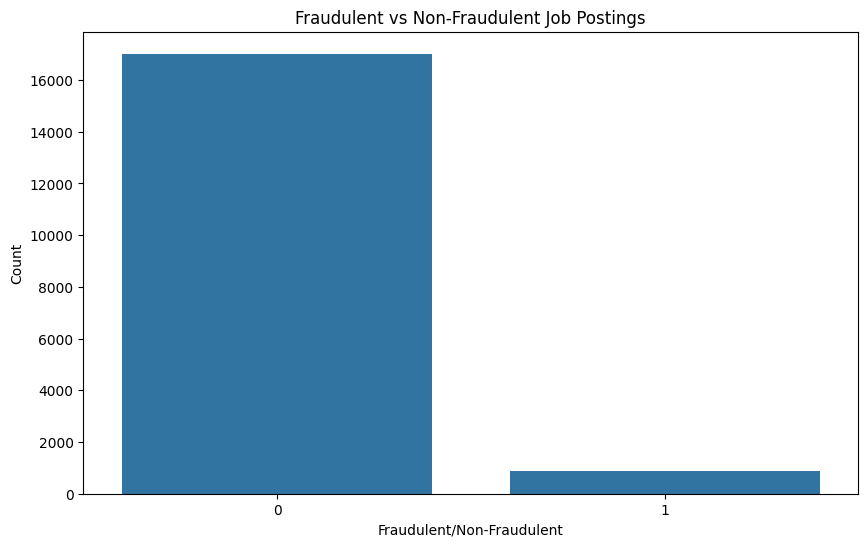

In [14]:
# plot the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='fraudulent', data=df)
plt.xlabel('Fraudulent/Non-Fraudulent')
plt.ylabel('Count')
plt.title('Fraudulent vs Non-Fraudulent Job Postings')
plt.show()

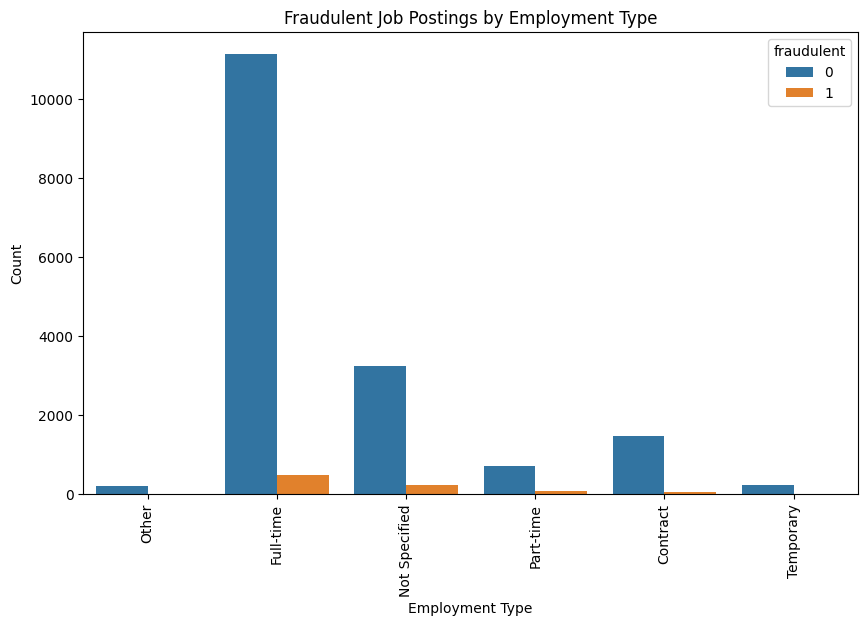

In [ ]:
# fraudulent job by employment type
plt.figure(figsize=(10, 6))
sns.countplot(x='employment_type', data=df, hue='fraudulent')
plt.xticks(rotation=90)
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Fraudulent Job Postings by Employment Type')
plt.show()


<p>Most jobs are fraudulent having full-time as a employment type and are least fraudelent having temporary employment type.</p>

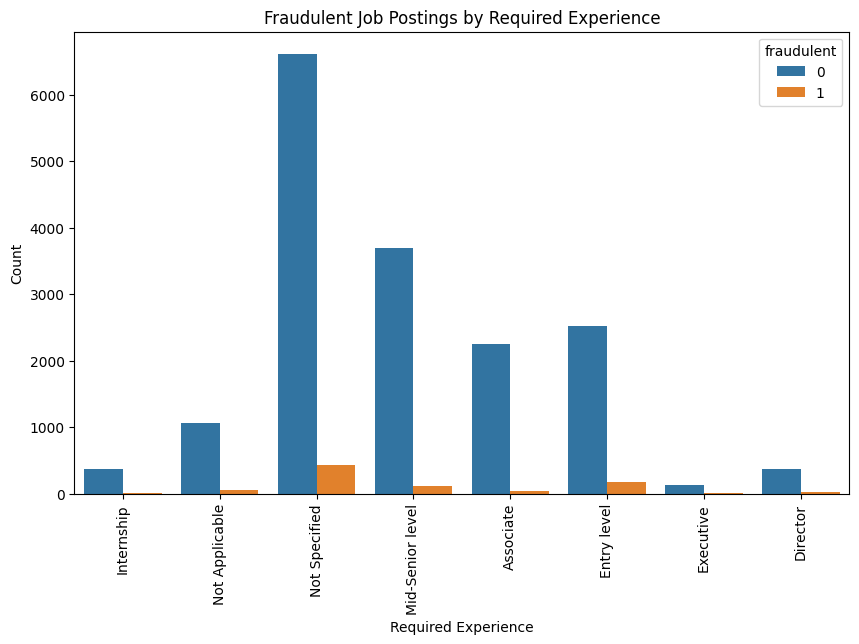

In [ ]:
# count plot of fraudulent job postings by required experience
plt.figure(figsize=(10, 6))
sns.countplot(x='required_experience', data=df, hue='fraudulent')
plt.xticks(rotation=90)
plt.xlabel('Required Experience')
plt.ylabel('Count')
plt.title('Fraudulent Job Postings by Required Experience')
plt.show()

<p> From above most entry level jobs are in fradulent category</p>

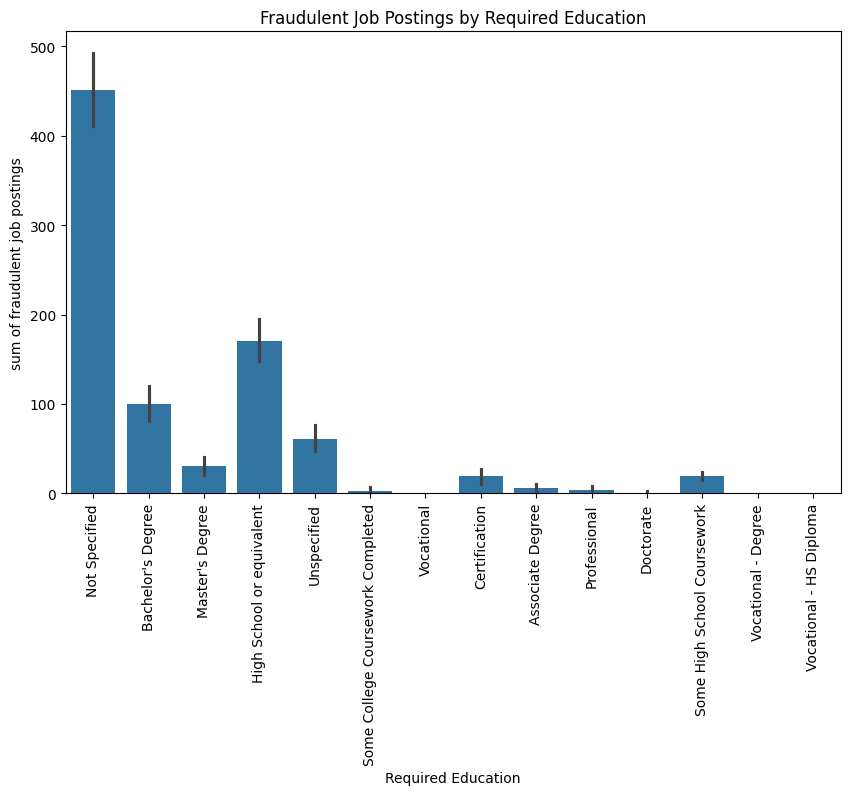

In [32]:
# Bar plot of fraudulent job postings by required education
plt.figure(figsize=(10, 6))
sns.barplot(x='required_education', y='fraudulent', data=df, estimator=sum)
plt.xticks(rotation=90)
plt.xlabel('Required Education')
plt.ylabel('sum of fraudulent job postings')
plt.title('Fraudulent Job Postings by Required Education')
plt.show()

<p> Here we can see most of the fraud job have required education not specified. So this also might be the determining factor that fraud job has no education experience specified. </p>

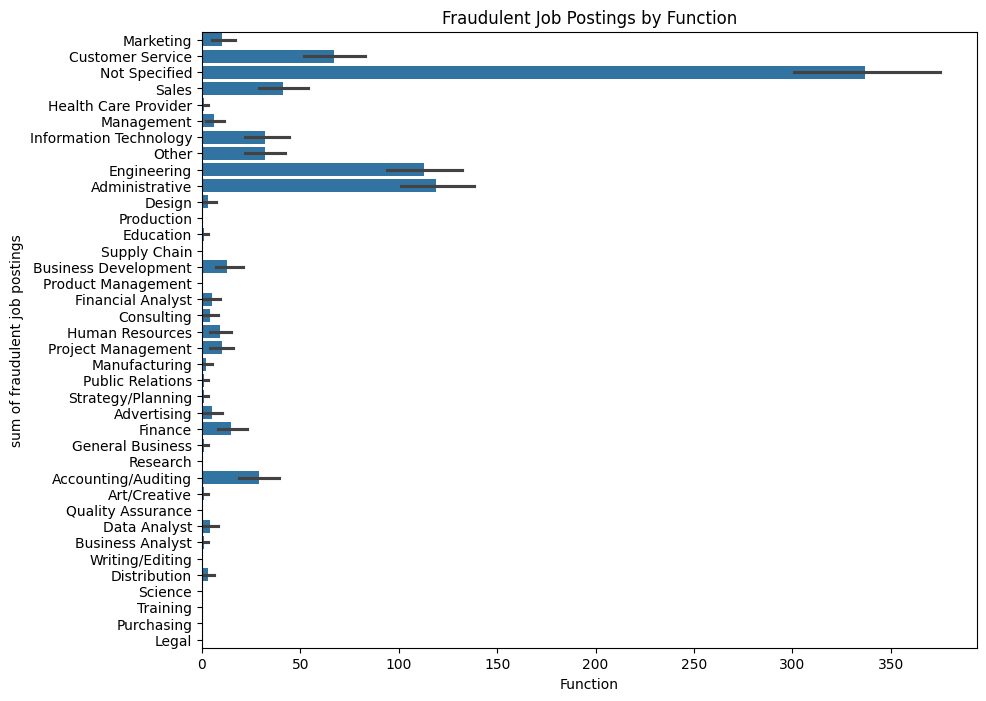

In [38]:
# sum of fraud posting by function
plt.figure(figsize=(10, 8))
sns.barplot(x='fraudulent', y='function', data=df, estimator=sum)
plt.xticks()
plt.xlabel('Function')
plt.ylabel('sum of fraudulent job postings')
plt.title('Fraudulent Job Postings by Function')
plt.show()

<p>This also suggests that the fraud job has no any function specified. Moreover, Administrative jobs are most fraudulent function among the specified.</p>